<h3><b>This notebook contains the generalized mixed effects models for the lose-shift w. video ratings hypothesis test</b></h3>
<p>It details the both the model selection procedure and the final hypothesis test</p>
<li>Selecting best fitting probability function for the generalized model (gamma or inverse gaussian)
<li>Selecting the best fitting link function for the model (log, identity or inverse)
<li>Selecting the best fitting random effects structure for the model (random intercepts and by-participant random slopes - as was done in the original analyses)
<li>Selecting the best fitting covariate structure (age, sex, working memory)
<p>This will be done by comparing model fit with BIC scores (as before)</p>
<p>Results will then be reported for only the <b>best fitting model</b></p>
<br>
<p>NB this notebook is run in r (rather than python - as previous analysis notebooks were) - due to better implementation of generalized mixed effects models in r </p>

In [2]:
library(tidyverse)
library(lme4)
library(ggplot2)
task_summary <- read.csv("U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/dem_vids_task_excluded.csv")

Determine best link and probability function for this model

In [3]:
##firstly we test whether model should use a gamma or inverse gaussian probability function
##and whether the link function should be identity or inverse
gamma_log <- glmer(lose_shift ~block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="log"))
gamma_inverse <- glmer(lose_shift ~block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="inverse"))
gamma_identity <- glmer(lose_shift ~block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="identity"))

invgaus_log <- glmer(lose_shift ~block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=inverse.gaussian(link="log"))
invgaus_inverse <- glmer(lose_shift ~block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=inverse.gaussian(link="inverse"))
invgaus_identity <- glmer(lose_shift ~block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=inverse.gaussian(link="identity"))

                        Model       BIC
3             Gamma (identity -1593.697
1                 Gamma (log) -1585.851
2             Gamma (inverse) -1565.289
6 Inverse Gaussian (identity) -1521.572
4      Inverse Gaussian (log) -1510.362
5  Inverse Gaussian (inverse) -1483.811


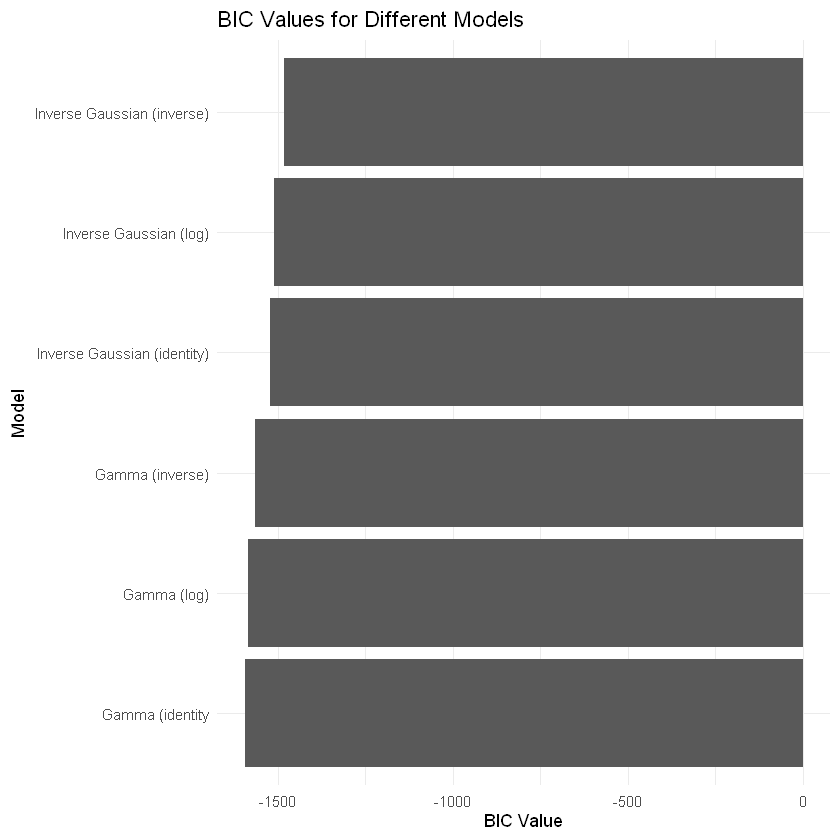

In [4]:
bic_values <- c(
  BIC(gamma_log),
  BIC(gamma_inverse),
  BIC(gamma_identity),
  BIC(invgaus_log),
  BIC(invgaus_inverse),
  BIC(invgaus_identity)
)
model_names <- c("Gamma (log)", "Gamma (inverse)", "Gamma (identity", "Inverse Gaussian (log)", "Inverse Gaussian (inverse)", "Inverse Gaussian (identity)")

bic_df <- data.frame(Model = model_names, BIC = bic_values)

bic_df <- bic_df[order(bic_df$BIC), ]

# Plot the BIC values
ggplot(bic_df, aes(x = reorder(Model, BIC), y = BIC)) +
  geom_bar(stat = "identity") + 
  labs(title = "BIC Values for Different Models",
       x = "Model",
       y = "BIC Value") +
  theme_minimal() +
  coord_flip() 
print(bic_df)

Use this model and determine best random effects structure (as done before with linear mixed effects models in the python notebooks)
<p>Models which didn't converge are commented out

In [5]:
basic_model <- glmer(lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="identity"))

#feedback_randint <- glmer(lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|feedback_details), data=task_summary, family=Gamma(link="identity"))
fractals_randint <- glmer(lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals), data=task_summary, family=Gamma(link="identity"))
#feedback_fractals_randint <- glmer(lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals) + (1|feedback_details), data=task_summary, family=Gamma(link="identity"))

#randslope <- glmer(lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff + (block_type + valence_diff + arousal_diff + valence_habdiff|participant_no), data=task_summary, family=Gamma(link="identity"))
#feedback_randint_randslope <- glmer(lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff + (block_type + valence_diff + arousal_diff + valence_habdiff|participant_no) + (1|feedback_details), data=task_summary, family=Gamma(link="identity"))
#feedback_fractals_randint_randslope <- glmer(lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff + (block_type + valence_diff + arousal_diff + valence_habdiff|participant_no) + (1|feedback_details) + (1|fractals), data=task_summary, family=Gamma(link="identity"))

             Model       BIC
1      basic model -1593.697
2 fractals_randint -1587.548


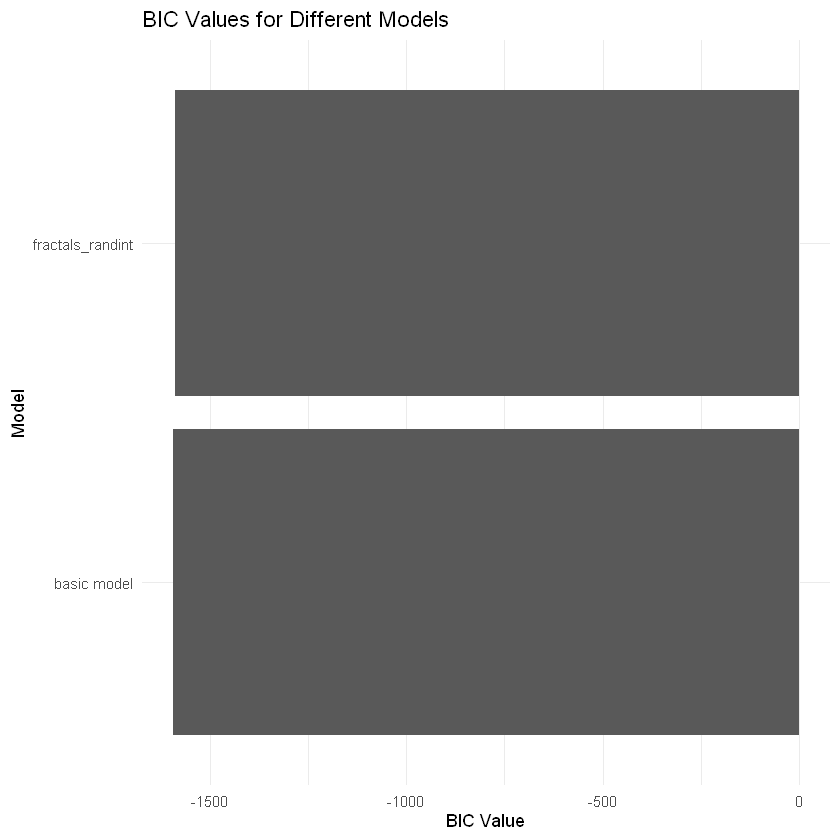

In [6]:
bic_values <- c(
  BIC(basic_model),
  BIC(fractals_randint)
)
model_names <- c("basic model", "fractals_randint")

bic_df <- data.frame(Model = model_names, BIC = bic_values)

bic_df <- bic_df[order(bic_df$BIC), ]

# Plot the BIC values
ggplot(bic_df, aes(x = reorder(Model, BIC), y = BIC)) +
  geom_bar(stat = "identity") + 
  labs(title = "BIC Values for Different Models",
       x = "Model",
       y = "BIC Value") +
  theme_minimal() +
  coord_flip() 
print(bic_df)

And now identify the best covariate structure

In [8]:
no_covariate <- basic_model

#sex_covariate <- glmer(lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff  + (1|participant_no)+ prolific_sex, data=task_summary, family=Gamma(link="identity"))
#age_covariate <- glmer(lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff  + (1|participant_no)+ prolific_age, data=task_summary, family=Gamma(link="identity"))
#digit_span_covariate <- glmer(lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff  + (1|participant_no)+ digit_span, data=task_summary, family=Gamma(link="identity"))
#sex_age_covariate <- glmer(lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff  + (1|participant_no)+ prolific_sex + prolific_age, data=task_summary, family=Gamma(link="identity"))
#sex_digit_span_covariate <- glmer(lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff  + (1|participant_no)+ prolific_sex + digit_span, data=task_summary, family=Gamma(link="identity"))
#digit_span_age_covariate <- glmer(lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff  + (1|participant_no)+ digit_span + prolific_age, data=task_summary, family=Gamma(link="identity"))
#sex_digit_span_age_covariate <- glmer(lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff  + (1|participant_no)+ prolific_sex + prolific_age + digit_span, data=task_summary, family=Gamma(link="identity"))

In [ ]:
##only no covariate converges so use that one

Hypothesis test with best fitting model

In [9]:
summary(no_covariate)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Gamma  ( identity )
Formula: 
lose_shift ~ block_type + valence_diff + arousal_diff + valence_habdiff +  
    (1 | participant_no)
   Data: task_summary

     AIC      BIC   logLik deviance df.resid 
 -1633.1  -1593.7    824.6  -1649.1     1012 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.57848 -0.57964 -0.00125  0.55944  2.67923 

Random effects:
 Groups         Name        Variance Std.Dev.
 participant_no (Intercept) 0.009516 0.09755 
 Residual                   0.026906 0.16403 
Number of obs: 1020, groups:  participant_no, 340

Fixed effects:
                   Estimate Std. Error t value Pr(>|z|)    
(Intercept)       0.6573586  0.0126194  52.091  < 2e-16 ***
block_typeFear    0.0085007  0.0064622   1.315    0.188    
block_typePoints  0.0295101  0.0065569   4.501 6.78e-06 ***
valence_diff      0.0058092  0.0061681   0.942    0.346    
arousal_diff     -